In [91]:
!nvidia-smi

Wed Jul  3 22:47:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.14                 Driver Version: 531.14       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:02:00.0 Off |                  N/A |
| N/A   50C    P8                4W /  N/A|     50MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Hits@1: 0.5894568690095847
Hits@3: 0.7412140575079872
Hits@5: 0.8083067092651757
Hits@10: 0.8730031948881789
Mean Reciprocal Rank: 0.6852189302444458

In [2]:
%pip install pykeen   

     ---------------------------------------- 0.0/83.8 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/83.8 kB ? eta -:--:--
     ------------- ------------------------ 30.7/83.8 kB 435.7 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/83.8 kB 245.8 kB/s eta 0:00:01
     --------------------------- ---------- 61.4/83.8 kB 363.1 kB/s eta 0:00:01
     -------------------------------------- 83.8/83.8 kB 362.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/704.0 kB ? eta -:--:--
    --------------------------------------- 10.2/704.0 kB ? eta -:--:--
   - ------------------------------------- 30.7/704.0 kB 660.6 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/704.0 kB 495.5 kB/s eta 0:00:02
   ---- ---------------------------------- 81.9/704.0 kB 512.0 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/704.0 kB 479.1 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/704.0 kB 504.4 kB/s eta 

In [36]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.5 kB 487.6 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/165.5 kB 762.6 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.5 kB 798.9 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 825.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 2.0 MB/s eta 0:00:04
   ---------------------------------------- 0.1/8.0 MB 919.0 kB/s eta 0:00:09
    --------------------------------------- 0.1/8.0 MB 901.1 kB/s eta 0:00:09
    --------------------------------------- 0.2/8.0 MB 1.1 MB/s eta 0:00:08
   - -------------------------------------- 0.2/8.0 MB 1.1 MB/s eta 0:00:08
   - -----------

In [4]:
import torch

# Check if CUDA is available and which device is being used
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"Using CUDA device: {torch.cuda.get_device_name(device)}")
else:
    device = torch.device('cpu')
    print("Using CPU")

Using CPU


In [10]:
from pykeen.pipeline import pipeline
from pykeen.models import TransE
from pykeen.datasets import DBpedia50

In [11]:


dataset = DBpedia50()

In [31]:
import pandas as pd
df = pd.read_csv(r"C:\Users\pasin\Downloads\ss_final.csv")
df

,subject,predicate,object
0,https://aimht.lstpedia.org/พระบรมธาตุสวี,https://aimht.lstpedia.org/สถานที่ที่เกี่ยวข้อง,ศาลพระเสื้อเมือง
1,https://aimht.lstpedia.org/ศาลกรมหลวงชุมพรเขตร...,https://aimht.lstpedia.org/รูปทรง,เรือจำลองจักรีนฤเบศร
2,https://aimht.lstpedia.org/ลูกปัด,https://aimht.lstpedia.org/ลูกปัดที่ค้นพบ,"ลูกปัดหินควอทซ์, คาร์เนเลียน, อาเกต, และโอนิกซ..."
3,https://aimht.lstpedia.org/พระบรมธาตุสวี,https://aimht.lstpedia.org/รูปทรง,ระฆังบนฐานสี่เหลี่ยมซ้อนกันสองชั้น
4,https://aimht.lstpedia.org/ศาลกรมหลวงชุมพรเขตร...,https://aimht.lstpedia.org/อยู่ใกล้,ชายหาดแหลมสน
...,...,...,...
664,https://aimht.lstpedia.org/เมืองสังกัสนคร,https://aimht.lstpedia.org/DATE,สมัยพุทธกาล
665,https://aimht.lstpedia.org/เมืองสังกัสนคร,https://aimht.lstpedia.org/LOCATION,อินเดีย
666,https://aimht.lstpedia.org/ยอดเขาพระสิเนรุราช,https://aimht.lstpedia.org/PLACE,เขาพระ
667,https://aimht.lstpedia.org/เมืองสังกัสนคร,https://aimht.lstpedia.org/LOCATION,เมืองโบราณ


In [34]:
import random
random_choice = random.choice(['subject', 'object'])
value = random.choice(df[random_choice].unique())

# Filter the DataFrame based on the random selection
filtered_df = df[(df['subject'] == value) | (df['object'] == value)]

# Print the filtered DataFrame
print(f"\nFiltered DataFrame based on {random_choice} '{value}':")
filtered_df


Filtered DataFrame based on subject 'https://aimht.lstpedia.org/ไอ้ด่างบางมุด':


,subject,predicate,object
108,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/LOCATION,หาดยาว
118,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/LOCATION,อำเภอสวี
123,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/LOCATION,จังหวัดชุมพร
129,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/PLACE,ศาลกรมหลวงชุมพร
140,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/PLACE,แหล่งโบราณคดีถ้ำถ้วย
149,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/LOCATION,หาดอรุโณทัย
152,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/LOCATION,คลองปากน้ำตะโก
188,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/LOCATION,คลองสวี
197,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/LOCATION,เขาทะลุ
216,https://aimht.lstpedia.org/ไอ้ด่างบางมุด,https://aimht.lstpedia.org/LOCATION,ตำบลเขาทะลุ


In [61]:
subjects = df['subject'].unique()
random_subjects = random.sample(list(subjects), 2)  # Picks 2 unique subjects

# Filter the DataFrame based on the selected subjects
filtered_df2 = df[(df['subject'].isin(random_subjects)) | (df['object'].isin(random_subjects))]

# Print the filtered DataFrame
print(f"\nFiltered DataFrame based on subjects {random_subjects}:")
filtered_df2


Filtered DataFrame based on subjects ['https://aimht.lstpedia.org/ประเพณีขึ้นถ้ำรับร่อ', 'https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น ']:


,subject,predicate,object
25,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/LOCATION,จังหวัดระนอง
55,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/LOCATION,ถนนเพชรเกษม
57,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/LOCATION,เขาฝาชี
70,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/LOCATION,อำเภอละอุ่น
79,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/LOCATION,อ่าวไทย
88,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/LOCATION,อำเภอเมืองชุมพร
100,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/LOCATION,ละอุ่น
113,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/PLACE,คลองละอุ่น
135,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/LOCATION,ญี่ปุ่น
164,https://aimht.lstpedia.org/พื้นที่ปากคลองละอุ่น,https://aimht.lstpedia.org/PLACE,พิพิธภัณฑ์เชิงประวัติศาสตร์สงครามโลกครั้งที่ 2


In [42]:
type(filtered_df)

pandas.core.frame.DataFrame

In [43]:
type(df)

pandas.core.frame.DataFrame

In [54]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

'wget' is not recognized as an internal or external command,
operable program or batch file.


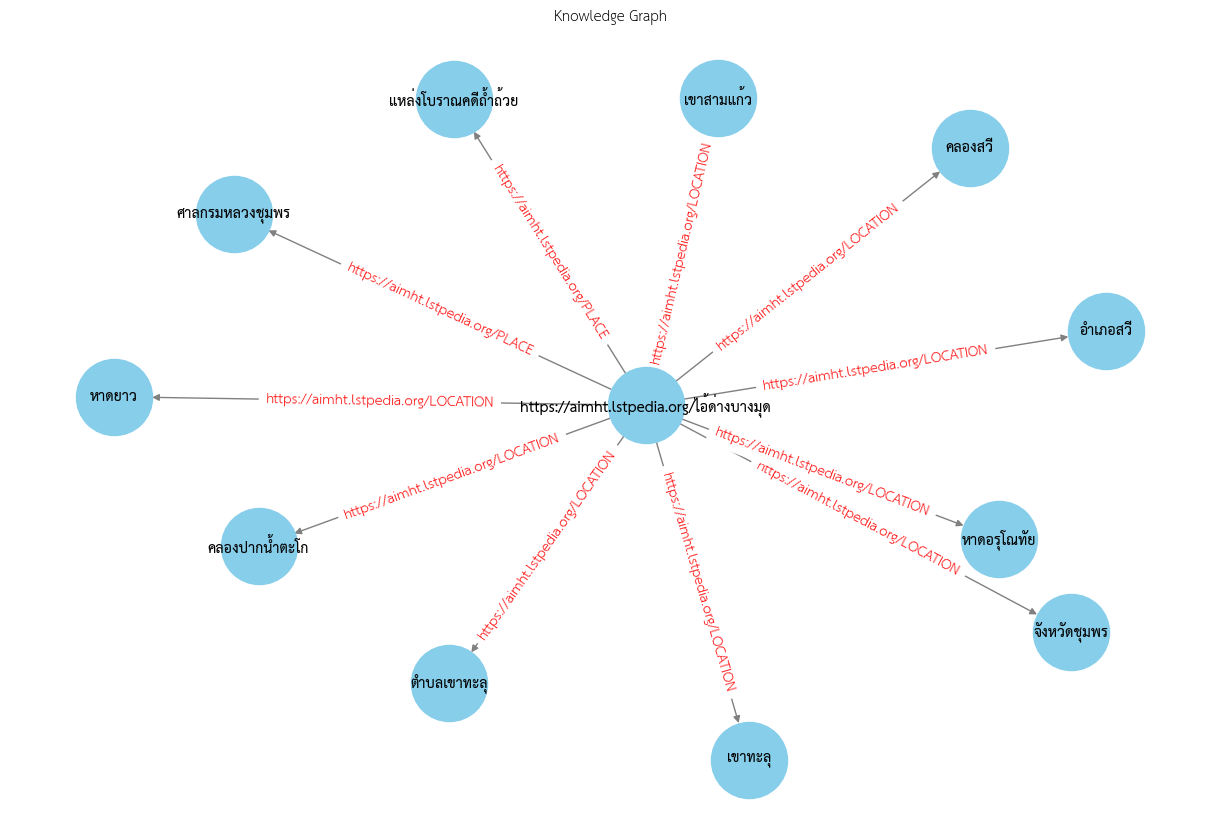

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for index, row in filtered_df.iterrows():
    G.add_edge(row['subject'], row['object'], label=row['predicate'])

# Define position layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
mpl.font_manager.fontManager.addfont(r'C:\Users\pasin\Downloads\thsarabunnew-webfont.ttf') #add thai font
mpl.rc('font', family='TH Sarabun New')

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_color='black', font_weight='bold', edge_color='gray', font_family=thai_font.get_name())

# Draw edge labels
edge_labels = {(row['subject'], row['object']): row['predicate'] for index, row in filtered_df.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=15, font_family=thai_font.get_name())

# Show plot
plt.title("Before 2 entity", fontproperties=thai_font)
plt.show()

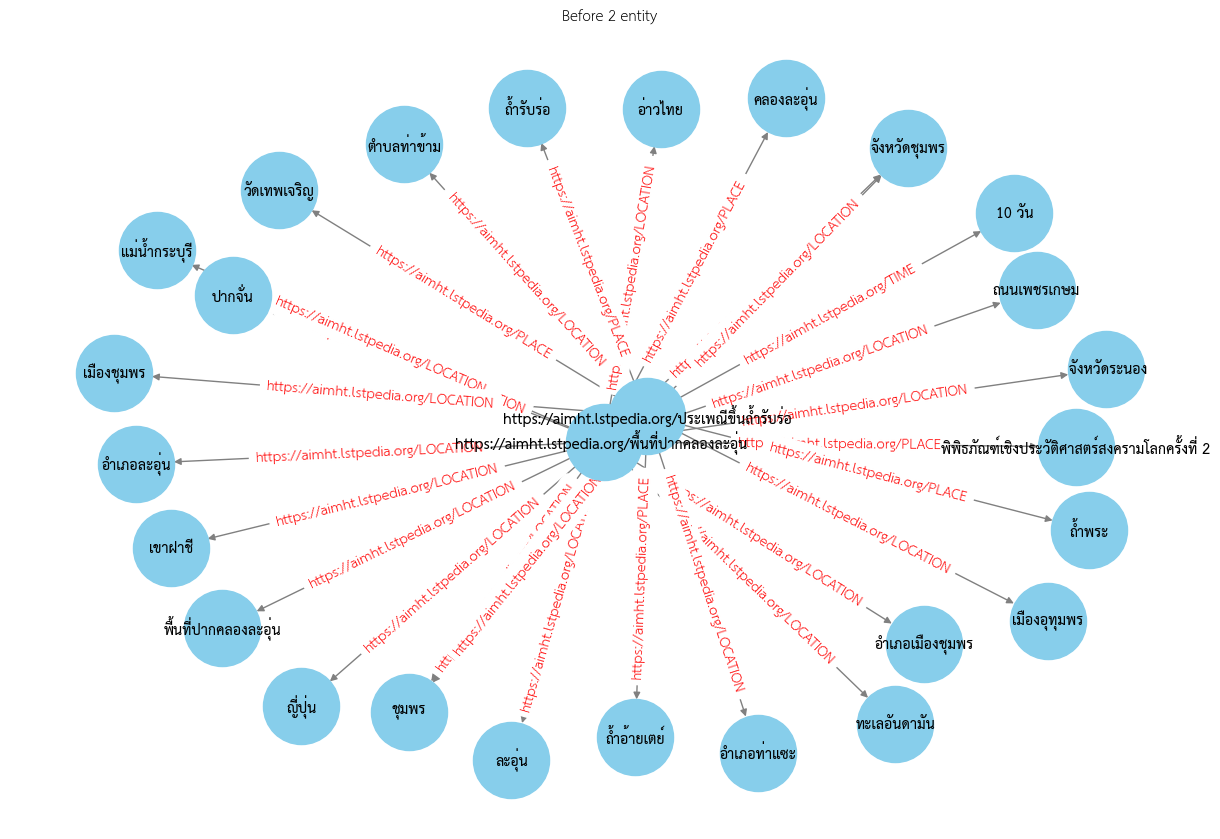

In [65]:
G = nx.DiGraph()

# Add edges to the graph
for index, row in filtered_df2.iterrows():
    G.add_edge(row['subject'], row['object'], label=row['predicate'])

# Define position layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
mpl.font_manager.fontManager.addfont(r'C:\Users\pasin\Downloads\thsarabunnew-webfont.ttf') #add thai font
mpl.rc('font', family='TH Sarabun New')

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_color='black', font_weight='bold', edge_color='gray', font_family=thai_font.get_name())

# Draw edge labels
edge_labels = {(row['subject'], row['object']): row['predicate'] for index, row in filtered_df2.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=15, font_family=thai_font.get_name())

# Show plot
plt.title("Before 2 entity", fontproperties=thai_font)
plt.show()

In [32]:
from pykeen.triples import TriplesFactory

# Assuming your dataframe has columns 'subject', 'predicate', 'object'
triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['subject', 'predicate', 'object']].values,
)

training = triples_factory
validation = triples_factory
testing = triples_factory

d=training
id_to_entity={v: k for k, v in d.entity_to_id.items()}
id_to_relation={v: k for k, v in d.relation_to_id.items()}

# Display the first few triples
triples_factory.triples

array([['https://aimht.lstpedia.org/คอคอดกระ (กิ่วกระ)',
        'https://aimht.lstpedia.org/LOCATION', 'กิ่วกระ'],
       ['https://aimht.lstpedia.org/คอคอดกระ (กิ่วกระ)',
        'https://aimht.lstpedia.org/LOCATION', 'จังหวัดชุมพร'],
       ['https://aimht.lstpedia.org/คอคอดกระ (กิ่วกระ)',
        'https://aimht.lstpedia.org/LOCATION', 'จังหวัดระนอง'],
       ...,
       ['https://aimht.lstpedia.org/ไอ้ด่างบางมุด',
        'https://aimht.lstpedia.org/LOCATION', 'เขาสามแก้ว'],
       ['https://aimht.lstpedia.org/ไอ้ด่างบางมุด',
        'https://aimht.lstpedia.org/PLACE', 'ศาลกรมหลวงชุมพร'],
       ['https://aimht.lstpedia.org/ไอ้ด่างบางมุด',
        'https://aimht.lstpedia.org/PLACE', 'แหล่งโบราณคดีถ้ำถ้วย']],
      dtype='<U85')

In [106]:
from pykeen.pipeline import pipeline

before_result = pipeline(
    model='TransE',
    loss="softplus",
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=3),  # Increase the embedding dimension
    optimizer_kwargs=dict(lr=0.1),  # Adjust the learning rate
    training_kwargs=dict(num_epochs=100, use_tqdm_batch=False),  # Increase the number of epochs
)

# The trained model is stored in the pipeline result
beforemodel = before_result.model

INFO:pykeen.pipeline.api:Using device: None


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.15s seconds


In [108]:
from pykeen.evaluation import RankBasedEvaluator

# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(
    beforemodel,
    testing.mapped_triples,
    additional_filter_triples=[
        training.mapped_triples,
        validation.mapped_triples
    ]
    )

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.13s seconds


Hits@1: 0.09424920127795527
Hits@3: 0.19089456869009586
Hits@5: 0.2539936102236422
Hits@10: 0.3753993610223642
Mean Reciprocal Rank: 0.19056203961372378


In [75]:
# Import necessary libraries
from pykeen.pipeline import pipeline
from pykeen.models import TransE
import optuna

# Define your training, testing, and validation data (assuming you have these prepared)

def get_metrics(result):
    """
    Extract multiple metrics from the evaluation result.
    """
    metrics = {
        'hits@1': result.get_metric('hits@1'),
        'hits@3': result.get_metric('hits@3'),
        'hits@5': result.get_metric('hits@5'),
        'meanreciprocalrank': result.get_metric('meanreciprocalrank')
    }
    return metrics

def objective(trial: optuna.Trial) -> float:
    # Define model-specific parameters to be optimized
    model_kwargs = {
        'embedding_dim': trial.suggest_categorical('embedding_dim', [50, 100, 200]),
        'random_seed': 42  # You can fix the random seed if needed
    }

    # Define optimizer parameters to be optimized
    optimizer_kwargs = {
        'lr': trial.suggest_loguniform('lr', 1e-5, 1e-1)
    }

    # Define training parameters
    training_kwargs = {
        'num_epochs': 100,
        'use_tqdm_batch': False
    }

    # Call the optimization pipeline
    result = pipeline(
        model=TransE,
        training=training,
        testing=testing,
        validation=validation,
        model_kwargs=model_kwargs,
        optimizer_kwargs=optimizer_kwargs,
        training_kwargs=training_kwargs,
        device='cpu',  # or specify your device
    )

    # Extract metrics
    metrics = get_metrics(result)

    # Optionally, print metrics for debugging
    print(f"Metrics: {metrics}")

    # Return the mean of the hit@k metrics as the objective value (customize as needed)
    return (metrics['hits@1'] + metrics['hits@3'] + metrics['hits@5']) / 3

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # Limiting the number of trials to 100

# Get the best parameters and retrain the model with them
best_params = study.best_params
best_model = TransE(**best_params)

# Optionally, you can retrain the best model using the full training data if needed


[I 2024-07-03 22:25:42,273] A new study created in memory with name: no-name-644d0ee4-1051-47b1-b202-0095ba06cce5
C:\Users\pasin\AppData\Local\Temp\ipykernel_12716\1437509802.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lr': trial.suggest_loguniform('lr', 1e-5, 1e-1)
INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.38s seconds
[I 2024-07-03 22:26:07,504] Trial 0 finished with value: 0.07108626198083066 and parameters: {'embedding_dim': 200, 'lr': 0.07925842823406914}. Best is trial 0 with value: 0.07108626198083066.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.02156549520766773, 'hits@3': 0.07987220447284345, 'hits@5': 0.11182108626198083, 'meanreciprocalrank': 0.08910665661096573}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.39s seconds
[I 2024-07-03 22:26:32,306] Trial 1 finished with value: 0.786741214057508 and parameters: {'embedding_dim': 200, 'lr': 0.00852789074443151}. Best is trial 1 with value: 0.786741214057508.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.6517571884984026, 'hits@3': 0.8298722044728435, 'hits@5': 0.8785942492012779, 'meanreciprocalrank': 0.7526615262031555}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.37s seconds
[I 2024-07-03 22:26:59,732] Trial 2 finished with value: 0.014110756123535675 and parameters: {'embedding_dim': 50, 'lr': 0.00012267887559203993}. Best is trial 1 with value: 0.786741214057508.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.0, 'hits@3': 0.01437699680511182, 'hits@5': 0.027955271565495207, 'meanreciprocalrank': 0.028813457116484645}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.21s seconds
[I 2024-07-03 22:27:27,826] Trial 3 finished with value: 0.88604898828541 and parameters: {'embedding_dim': 50, 'lr': 0.009560155480860618}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.762779552715655, 'hits@3': 0.9376996805111821, 'hits@5': 0.957667731629393, 'meanreciprocalrank': 0.8508789539337158}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.36s seconds
[I 2024-07-03 22:27:50,171] Trial 4 finished with value: 0.4810969116080937 and parameters: {'embedding_dim': 200, 'lr': 0.018824948742377254}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.2963258785942492, 'hits@3': 0.5239616613418531, 'hits@5': 0.6230031948881789, 'meanreciprocalrank': 0.4519253671169281}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.36s seconds
[I 2024-07-03 22:28:13,121] Trial 5 finished with value: 0.019169329073482427 and parameters: {'embedding_dim': 200, 'lr': 4.741579001672598e-05}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.0, 'hits@3': 0.02156549520766773, 'hits@5': 0.035942492012779555, 'meanreciprocalrank': 0.03746110945940018}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.40s seconds
[I 2024-07-03 22:28:38,414] Trial 6 finished with value: 0.8684771033013844 and parameters: {'embedding_dim': 200, 'lr': 0.002622146822292487}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.6637380191693291, 'hits@3': 0.9608626198083067, 'hits@5': 0.9808306709265175, 'meanreciprocalrank': 0.8112519979476929}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.28s seconds
[I 2024-07-03 22:29:05,702] Trial 7 finished with value: 0.0077209797657082 and parameters: {'embedding_dim': 50, 'lr': 6.938792854628494e-05}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.0, 'hits@3': 0.007987220447284345, 'hits@5': 0.015175718849840255, 'meanreciprocalrank': 0.021332301199436188}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.56s seconds
[I 2024-07-03 22:29:39,783] Trial 8 finished with value: 0.3354632587859425 and parameters: {'embedding_dim': 200, 'lr': 0.023089470440152065}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.18130990415335463, 'hits@3': 0.36900958466453676, 'hits@5': 0.4560702875399361, 'meanreciprocalrank': 0.31768012046813965}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.47s seconds
[I 2024-07-03 22:30:16,359] Trial 9 finished with value: 0.8242811501597443 and parameters: {'embedding_dim': 200, 'lr': 0.006493055641678685}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.7044728434504792, 'hits@3': 0.8618210862619808, 'hits@5': 0.9065495207667732, 'meanreciprocalrank': 0.7965061068534851}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.37s seconds
[I 2024-07-03 22:30:51,744] Trial 10 finished with value: 0.38924387646432373 and parameters: {'embedding_dim': 100, 'lr': 0.0005344206474775119}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.0, 'hits@3': 0.48242811501597443, 'hits@5': 0.6853035143769968, 'meanreciprocalrank': 0.29317012429237366}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.28s seconds
[I 2024-07-03 22:31:26,759] Trial 11 finished with value: 0.5157082002129926 and parameters: {'embedding_dim': 50, 'lr': 0.0014297235287542274}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.11741214057507987, 'hits@3': 0.6222044728434505, 'hits@5': 0.8075079872204473, 'meanreciprocalrank': 0.4049763083457947}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.61s seconds
[I 2024-07-03 22:32:02,985] Trial 12 finished with value: 0.751863684771033 and parameters: {'embedding_dim': 100, 'lr': 0.0019037586093407469}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.32028753993610226, 'hits@3': 0.9464856230031949, 'hits@5': 0.9888178913738019, 'meanreciprocalrank': 0.6289758682250977}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.38s seconds
[I 2024-07-03 22:32:39,719] Trial 13 finished with value: 0.005324813631522897 and parameters: {'embedding_dim': 50, 'lr': 1.1959936812956604e-05}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.0, 'hits@3': 0.005591054313099041, 'hits@5': 0.010383386581469648, 'meanreciprocalrank': 0.01568438485264778}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.37s seconds
[I 2024-07-03 22:33:14,799] Trial 14 finished with value: 0.0796059637912673 and parameters: {'embedding_dim': 50, 'lr': 0.0004298489395239208}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.001597444089456869, 'hits@3': 0.07747603833865814, 'hits@5': 0.1597444089456869, 'meanreciprocalrank': 0.10057740658521652}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.39s seconds
[I 2024-07-03 22:33:51,789] Trial 15 finished with value: 0.8807241746538871 and parameters: {'embedding_dim': 100, 'lr': 0.0031542329981663095}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.6876996805111821, 'hits@3': 0.9672523961661342, 'hits@5': 0.987220447284345, 'meanreciprocalrank': 0.8269109129905701}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.28s seconds
[I 2024-07-03 22:34:19,483] Trial 16 finished with value: 0.19648562300319491 and parameters: {'embedding_dim': 100, 'lr': 0.05339958866880174}. Best is trial 3 with value: 0.88604898828541.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.10383386581469649, 'hits@3': 0.19968051118210864, 'hits@5': 0.28594249201277955, 'meanreciprocalrank': 0.20504817366600037}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.44s seconds
[I 2024-07-03 22:34:51,262] Trial 17 finished with value: 0.9140042598509052 and parameters: {'embedding_dim': 100, 'lr': 0.0046578370382274435}. Best is trial 17 with value: 0.9140042598509052.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.8019169329073482, 'hits@3': 0.9592651757188498, 'hits@5': 0.9808306709265175, 'meanreciprocalrank': 0.882064700126648}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.30s seconds
[I 2024-07-03 22:35:29,192] Trial 18 finished with value: 0.8527689030883919 and parameters: {'embedding_dim': 100, 'lr': 0.010704109436145446}. Best is trial 17 with value: 0.9140042598509052.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.7412140575079872, 'hits@3': 0.8881789137380192, 'hits@5': 0.9289137380191693, 'meanreciprocalrank': 0.8248288035392761}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.31s seconds
[I 2024-07-03 22:35:56,669] Trial 19 finished with value: 0.4257188498402556 and parameters: {'embedding_dim': 100, 'lr': 0.0005837426936694236}. Best is trial 17 with value: 0.9140042598509052.
INFO:pykeen.pipeline.api:Using device: cpu


Metrics: {'hits@1': 0.0, 'hits@3': 0.5311501597444089, 'hits@5': 0.7460063897763578, 'meanreciprocalrank': 0.31278368830680847}


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

[W 2024-07-03 22:36:15,945] Trial 20 failed with parameters: {'embedding_dim': 50, 'lr': 0.02610450211734409} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\pasin\anaconda3\envs\gpu_gpt\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\pasin\AppData\Local\Temp\ipykernel_12716\1437509802.py", line 39, in objective
    result = pipeline(
             ^^^^^^^^^
  File "c:\Users\pasin\anaconda3\envs\gpu_gpt\Lib\site-packages\pykeen\pipeline\api.py", line 1542, in pipeline
    stopper_instance, configuration, losses, train_seconds = _handle_training(
                                                             ^^^^^^^^^^^^^^^^^
  File "c:\Users\pasin\anaconda3\envs\gpu_gpt\Lib\site-packages\pykeen\pipeline\api.py", line 1190, in _handle_training
    losses = training_loop_instance.train(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KeyboardInterrupt: 

In [89]:
# Import necessary libraries
from pykeen.pipeline import pipeline
from pykeen.models import TransE
from pykeen.losses import SoftplusLoss
import torch

# Define your training, testing, and validation data (assuming you have these prepared)

# Determine the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Run the pipeline with the specified parameters
amresult = pipeline(
    model=TransE,  # Pass the model class directly
    loss=SoftplusLoss,  # Specify the loss class
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=100),  # Adjust embedding dimension as needed
    optimizer_kwargs=dict(lr=0.0046578370382274435),  # Set learning rate
    training_kwargs=dict(num_epochs=100, use_tqdm_batch=False),  # Number of epochs and tqdm setting
    device=device,  # Use CUDA if available, otherwise fallback to CPU
    random_seed=3203241656  # Set random seed for reproducibility
)

# The trained model is stored in the pipeline result
tee_model = amresult.model



INFO:pykeen.pipeline.api:Using device: cpu


Training epochs on cpu:   0%|          | 0/100 [00:00<?, ?epoch/s]

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.29s seconds


In [86]:
result.model

TransE(
  (loss): SoftplusLoss(
    (margin_activation): Softplus(beta=1.0, threshold=20.0)
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(352, 100)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(21, 100)
    )
  )
  (weight_regularizers): ModuleList()
)

In [87]:
tee_model

TransE(
  (loss): SoftplusLoss(
    (margin_activation): Softplus(beta=1.0, threshold=20.0)
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(352, 100)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(21, 100)
    )
  )
  (weight_regularizers): ModuleList()
)

In [90]:
from pykeen.evaluation import RankBasedEvaluator

# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(
    tee_model,
    testing.mapped_triples,
    additional_filter_triples=[
        training.mapped_triples,
        validation.mapped_triples
    ]
    )

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

Evaluating on cpu:   0%|          | 0.00/626 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.26s seconds


Hits@1: 0.5894568690095847
Hits@3: 0.7412140575079872
Hits@5: 0.8083067092651757
Hits@10: 0.8730031948881789
Mean Reciprocal Rank: 0.6852189302444458


#Plot

In [95]:
amresult.model 

TransE(
  (loss): SoftplusLoss(
    (margin_activation): Softplus(beta=1.0, threshold=20.0)
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(352, 100)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(21, 100)
    )
  )
  (weight_regularizers): ModuleList()
)

In [115]:
import torch
import numpy as np

# Get the model from the pipeline result
model = tee_model

# Extract the entity embeddings
entity_embeddings_layer = model.entity_representations[0]._embeddings
entity_embeddings = entity_embeddings_layer.weight.detach().cpu().numpy()

# Extract the relation embeddings (if needed)
relation_embeddings_layer = model.relation_representations[0]._embeddings
relation_embeddings = relation_embeddings_layer.weight.detach().cpu().numpy()



In [116]:
from sklearn.decomposition import PCA

# Reduce dimensions for entity embeddings
pca_entities = PCA(n_components=2)
entity_embeddings_2d = pca_entities.fit_transform(entity_embeddings)

# Reduce dimensions for relation embeddings
pca_relations = PCA(n_components=2)
relation_embeddings_2d = pca_relations.fit_transform(relation_embeddings)



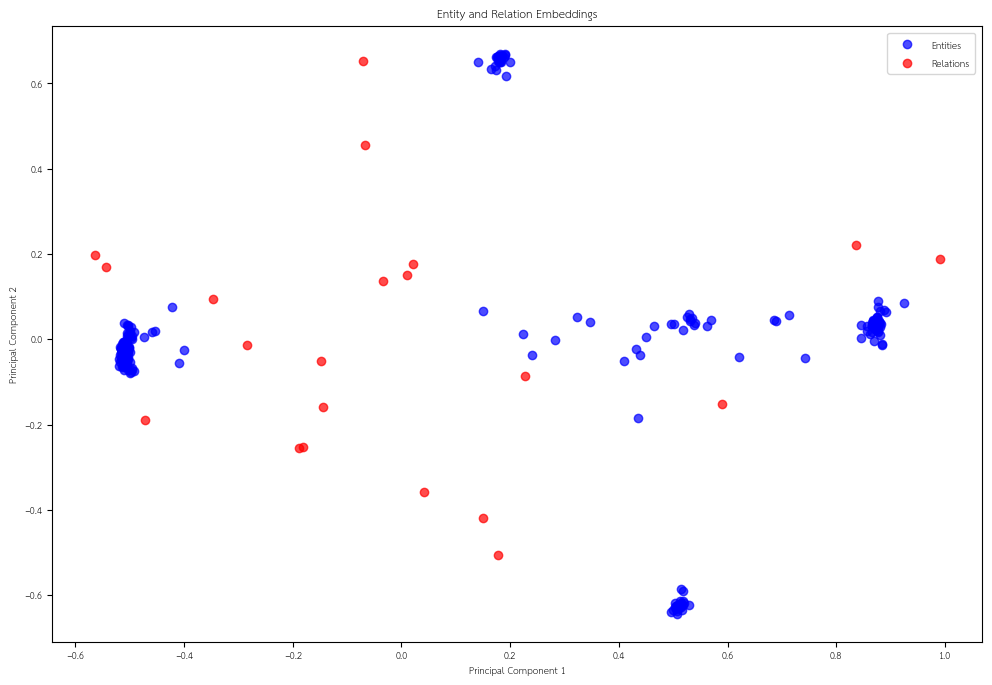

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot entity embeddings
plt.scatter(entity_embeddings_2d[:, 0], entity_embeddings_2d[:, 1], alpha=0.7, label='Entities', color='blue')

# Plot relation embeddings
plt.scatter(relation_embeddings_2d[:, 0], relation_embeddings_2d[:, 1], alpha=0.7, label='Relations', color='red')

plt.title('Entity and Relation Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
